# Recap

Until now all Page Object Model has these sctructures:
1. `base_page`: that conatains all the function needed to execute the dinamic steps
2. `login_page`: contains specific function to execute within the login page
3. `specific_test_scenario`: this will be a file that passing any value/attributes to call the proper function from page 2 to run the "exact" steps under the scenario provided

# Executing The test Scenario using POM method

## Creating the Script
Now we'll create the files no.3, that execute the same steps with the automated login page test before, but on this phase we'll using the POM method. Below scripts are the written code for using the method from previous files

In [ ]:
import pytest
from page_objects.login_page import LoginPage
from page_objects.login_success import LoginSuccessPage


class TestPositiveLogin:
    @pytest.mark.login
    @pytest.mark.positive
    def test_positive_login(self, driver):
        login_control = LoginPage(driver)
        login_verificator = LoginSuccessPage(driver)

        # Open page
        login_control.open_page()

        # Type username student into Username field
        # Type password Password123 into Password field
        # Push Submit button
        login_control.execute_login("student", "Password123")

        # Verify new page URL contains practicetestautomation.com/logged-in-successfully/
        # Verify new page contains expected text ('Congratulations' or 'successfully logged in')
        # Verify button Log out is displayed on the new page

        assert login_verificator.validate_url == login_verificator.get_url, "Actual URL is not the same as expected"
        assert login_verificator.get_header == "Logged In Successfully", "Header is not expected"
        assert login_verificator.get_sub_header == "Congratulations student. You successfully logged in!", \
            "Sub Header is not as expected"
        assert login_verificator.logout_validator(), "Logout CTA is not discoverable"


## Scripts Breakdown

### Modules importing

In [ ]:
import pytest
from page_objects.login_page import LoginPage
from page_objects.login_success import LoginSuccessPage

1. Introduction <br>
This documentation is intended to provide an overview of the two scripts, login_page.py and login_success.py, which are part of the page_objects package. These scripts provide classes that can be used to interact with the login page and the login success page of a website.
2. Usage <br>
In order to use these classes, you will need to import them into your project. You can do this by including the following lines at the top of your script
3. Script 1: login_page.py <br>
This script contains the LoginPage class, which is used to interact with the login page of a website. This class provides methods for entering the username and password, and for submitting the login form.
4. Script 2: login_success.py <br>
This script contains the LoginSuccessPage class, which is used to interact with the login success page of a website. This class provides methods for accessing the information displayed on the page after a successful login, such as the welcome message or the user's account details.
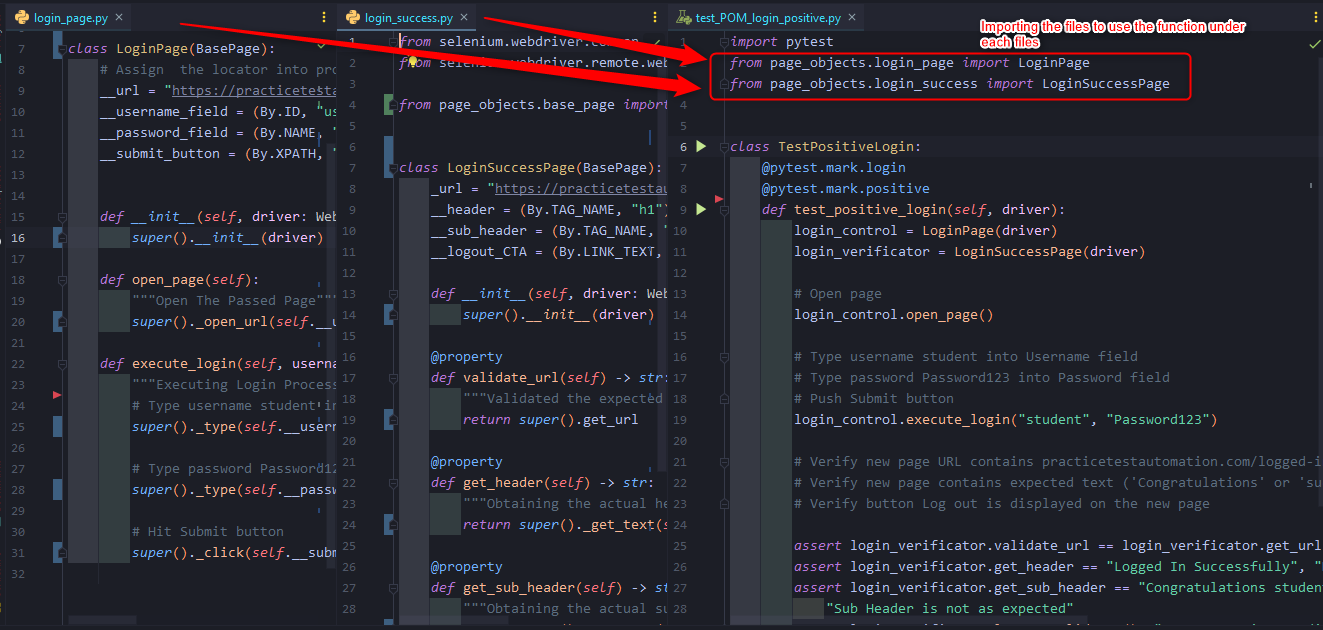

## Class Inheriting

In [ ]:
class TestPositiveLogin:
    @pytest.mark.login
    @pytest.mark.positive
    def test_positive_login(self, driver):
        login_control = LoginPage(driver)
        login_verificator = LoginSuccessPage(driver)

- The script contains a test class named `"TestPositiveLogin"`, which is used for automated testing. This class contains a single test method named `"test_positive_login"` that tests a positive login scenario on a website.
- The test method is decorated with two decorators, `@pytest.mark.login` and `@pytest.mark.positive`. These decorators allow the test to be organized and filtered based on their category.
- The test method takes one argument, `driver`, which is an instance of a web driver that is used to interact with the website under test. The web driver allows the script to interact with the website as if it were a human user.
- The test method creates an instance of the `LoginPage` class, which is used to **interact with the login page of the website**. It then creates an instance of the `LoginSuccessPage` class, which is used to **interact with the login success page of the website**.
- The `LoginPage` class is used to enter the username and password and submit the login form, and the `LoginSuccessPage` class is used to verify that the login was successful by checking the welcome message on the login success page.
- The test method then uses the instances of the `LoginPage` and `LoginSuccessPage` classes to perform the necessary actions to test the positive login scenario, such as entering the username and password, submitting the login form, and checking the welcome message on the login success page. Once the test is finished, the web driver will close the browser window.

## Passing the value & calling the method from imported files (modules)

### Open the Page

In [ ]:
def test_positive_login(self, driver):
    login_control = LoginPage(driver)
    login_control.open_page()

- The script contains a method named `"open_page()"` which is used to open the login page of a website. This method is a part of a class called `"LoginPage"`, which is used to interact with the login page of a website.
- The script creates an instance of the `LoginPage` class, which is represented by the `login_control` variable. The `open_page()` method is then called on the login_control instance.
- The `open_page()` method uses the web driver, which is passed as an argument when creating an instance of the `LoginPage` class, to open the login page of the website. It does this by calling the web driver's `get()` method, passing the URL of the login page as an argument.

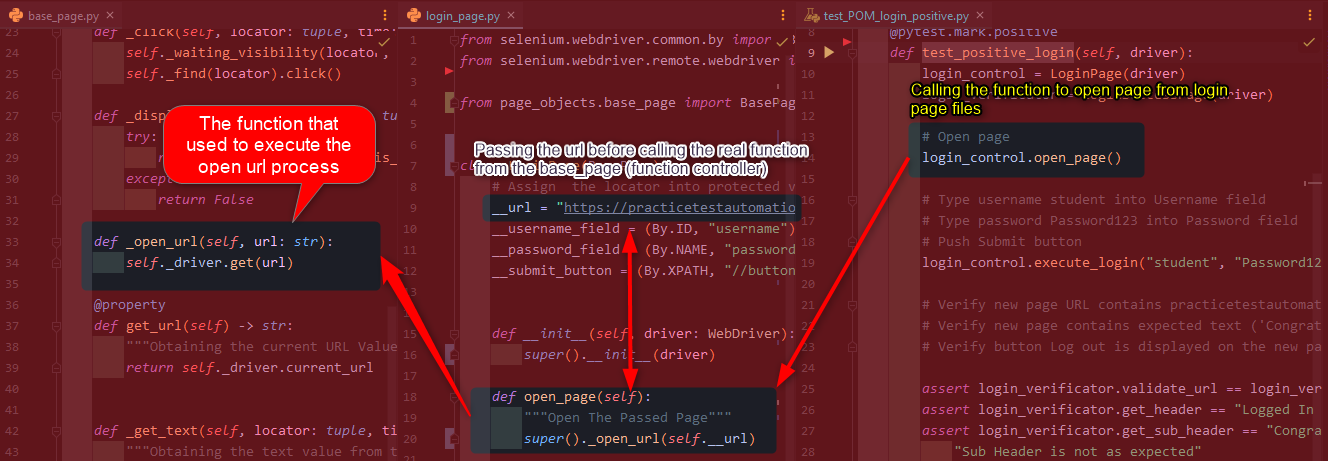

### Passing the value for respective fields

In [ ]:
def test_positive_login(self, driver):
    login_control = LoginPage(driver)
    login_control.execute_login("student", "Password123")

- The `execute_login()` method uses the *web driver*, which is passed as an argument when creating an instance of the `LoginPage` class, to interact with the login page. It does this by finding the HTML elements of the login page that correspond to the username and password fields, and the submit button. Then it enters the given ***username*** and ***password*** into those fields and ***clicking*** on the submit button.
- The login page has an input field with the id `"username"` and another input field with the id `"password"` and a submit button with the id `"submit-btn"`, the script will call the driver methods like `driver.find_element_by_id("username").send_keys("student")` to enter the given username, `driver.find_element_by_id("password").send_keys("Password123")` to enter the given password and driver.`find_element_by_id("submit-btn").click()` to submit the form <br>
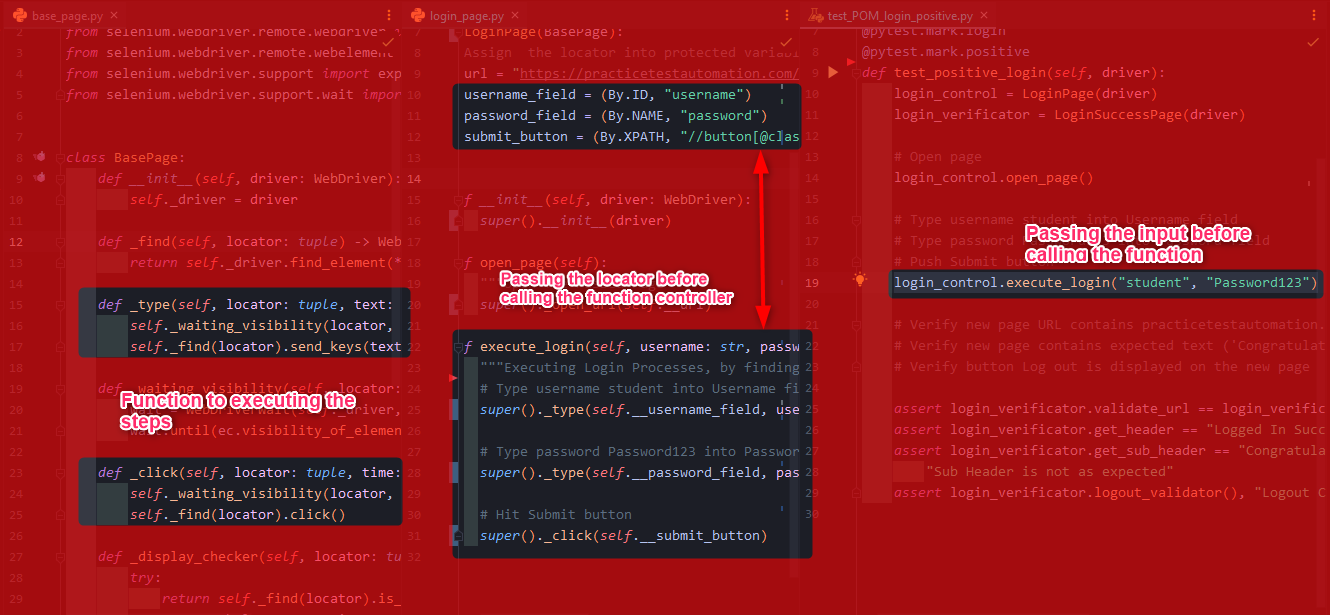

### Validating The Expected Output

In [ ]:
def test_positive_login(self, driver):
    login_verificator = LoginSuccessPage(driver)
    assert login_verificator.validate_url == login_verificator.get_url, "Actual URL is not the same as expected"
    assert login_verificator.get_header == "Logged In Successfully", "Header is not expected"
    assert login_verificator.get_sub_header == "Congratulations student. You successfully logged in!", \
        "Sub Header is not as expected"
    assert login_verificator.logout_validator(), "Logout CTA is not discoverable"

- This script contains a test method named "test_positive_login" which is used for automated testing. This method tests the positive login scenario by using the LoginSuccessPage class and asserts that the login was successful by checking the URL of the page, the header and sub header of the page, and whether the logout button is displayed on the page.
- The script creates an instance of the `LoginSuccessPage` class, which is represented by the `login_verificator` variable.
- The script uses the `validate_url` method, `get_url` method, `get_header` method, `get_sub_header` method, `logout_validator` method from the `login_verificator` instance to get the actual values of the URL, header, sub header, and whether the logout button is displayed or not.
- The script uses the assert statement to check if the actual URL, header and sub header are the same as the expected URL, header and sub header. If the actual value is the same as the expected value, the test will pass without any errors. If not, the test will fail with an error message.

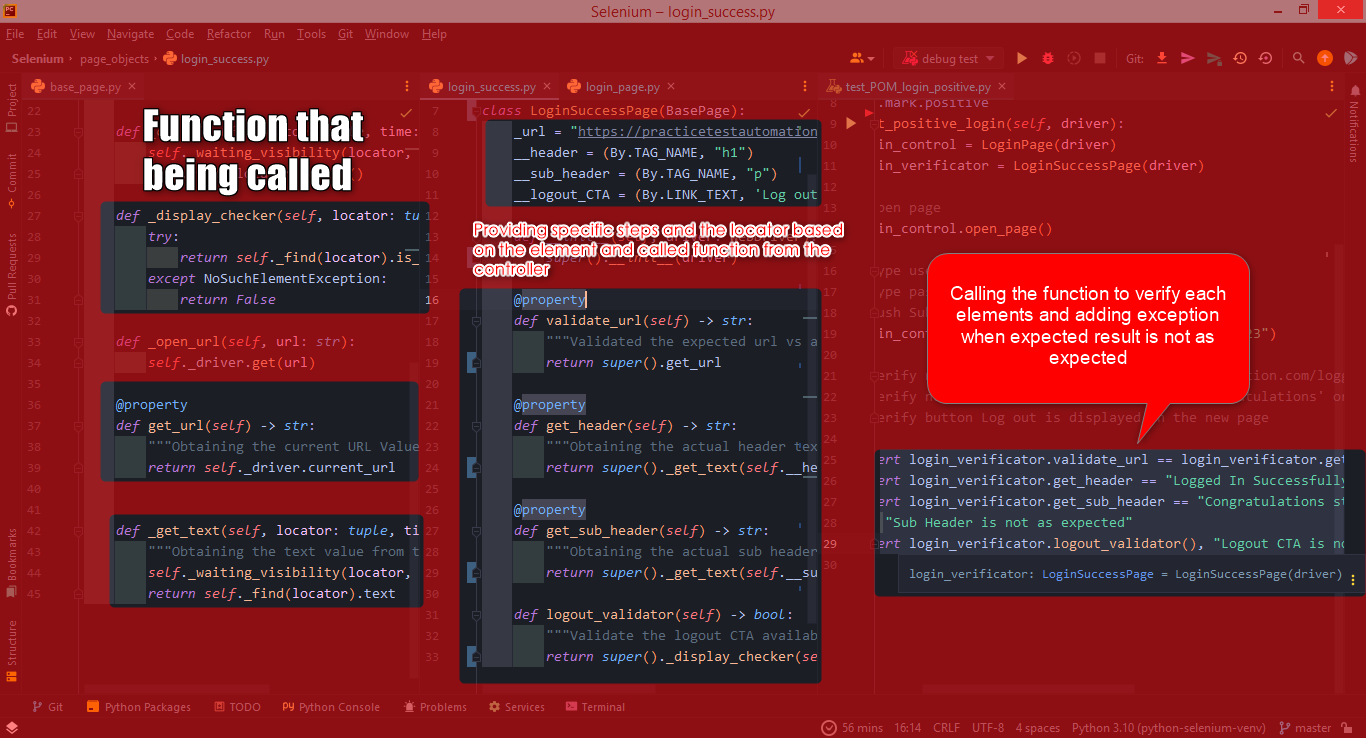